In [86]:
#!pip install seaborn

In [87]:
import pandas as pd
import numpy as np

In [57]:
file = pd.read_csv('marketing_customer_analysis.csv')
#display(file.head())
#display(file.tail())
file.shape

(10910, 26)

In [58]:
cols = []                        # standardizing the header names
for column in file.columns:
    cols.append(column.lower())
cols
file.columns = cols
file.head()
#file

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [59]:
column_names1 = file.columns  # for visualizing the column headers
column_names1

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [60]:
file.dtypes 

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [61]:
categorical = file.select_dtypes(object)     # extracting categorical data
#categorical

In [62]:
numerical = file.select_dtypes(np.number) # extracting numerical data from the main data for analyses
#numerical

In [63]:
file.isna().values.any() # checking if NaN values exist

True

In [64]:
file.isna().sum() # calculating the number of NaN values column by column

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [113]:
#file[file.isna().any(axis = 1)] # number of rows with at least one Null value


In [66]:
file['effective to date'] = pd.to_datetime(file['effective to date']) # extracting date-months from date

C:\Users\Admin\AppData\Local\Temp\ipykernel_12528\4011327174.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['effective to date'] = pd.to_datetime(file['effective to date']) # extracting date-months from date


In [112]:
#file['month'] = file['effective to date'].dt.month # extracting month from datetime
#file

#months_to_filter = [1, 2, 3]                          # filtering by months; januanry to March only
#file[file['month'].isin(months_to_filter)]
#file

In [69]:
file['vehicle type'].value_counts(dropna = False)

vehicle type
NaN    5482
A      5428
Name: count, dtype: int64

In [71]:
file['vehicle type'] = file['vehicle type'].fillna('M')
file['vehicle type'].value_counts(dropna = False)

vehicle type
M    5482
A    5428
Name: count, dtype: int64

In [111]:
#file.info()


In [96]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


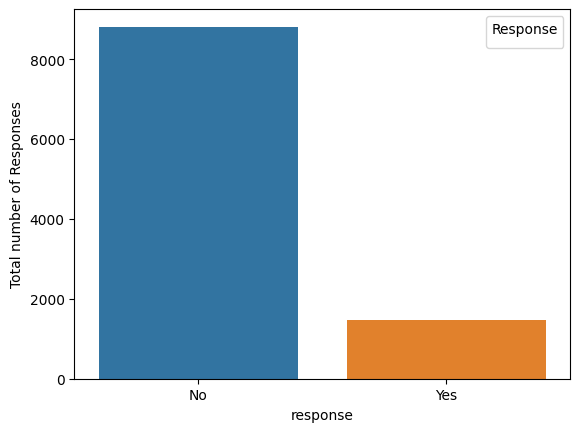

In [110]:
sns.countplot(x = 'response', data = file) # response graph
plt.ylabel('Total number of Responses')
plt.show()

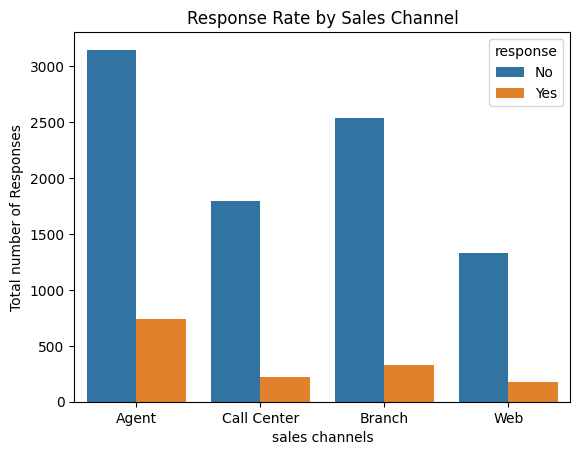

In [99]:
sns.countplot(x = 'sales channel', hue = 'response', data = file) # response by total sales amount
plt.ylabel('Total number of Responses')
plt.xlabel('sales channels')
plt.legend(title = 'response')
plt.title('Response Rate by Sales Channel')
plt.show()

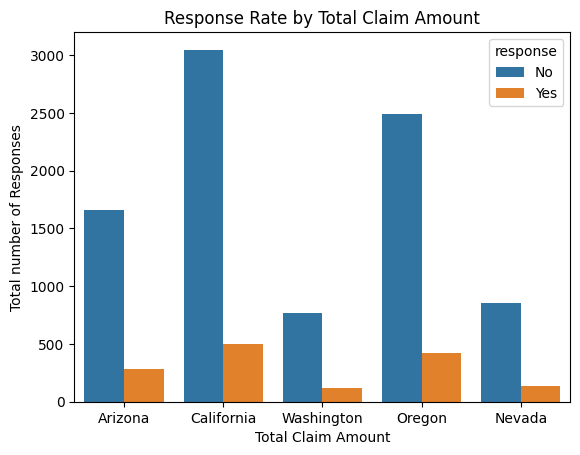

In [102]:
sns.countplot(x = 'total claim amount', hue = 'response', data = file) # response by total claim amount
plt.ylabel('Responses')
plt.xlabel('Total Claim Amount')
plt.legend(title = 'response')
plt.title('Response Rate by Total Claim Amount')
plt.show()

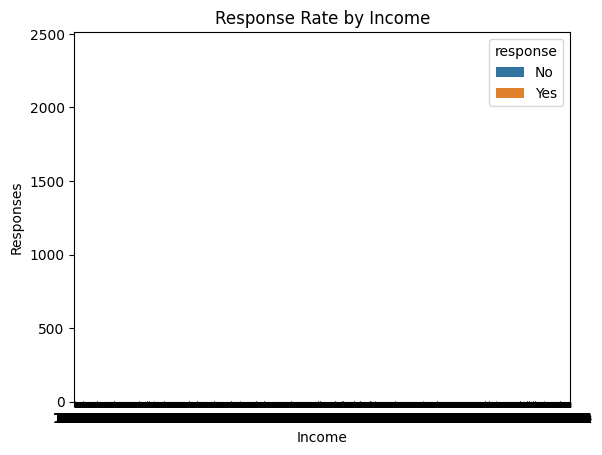

In [109]:
sns.countplot(x = 'income', hue = 'response', data = file) # response by income is refusing to present a good result
plt.ylabel('Responses')
plt.xlabel('Income')
plt.legend(title = 'response')
plt.title('Response Rate by Income')
plt.show()